# Table of Contents

- 1 ChEMBL
- 2 Installing ChEMBL web service package
- 3 importing libraries
- 4 Search for target tubulin protein
 - 4.1 Select and retrieve bioactivity data for tubulin (homo sapiens organism)
 - 4.2 Extracting IC50 data
 - 4.3 Converting data to dataframe
- 5 Handling missing data
- 6 Data pre-processing
 - 6.1 Labeling compounds as either being active, inactive or intermediate
 - 6.2 Convert IC50 to pIC50
 - 6.3 Removing the 'intermediate' bioactivity class
- 7 EDA
 - 7.1 Pairplot of the features
 - 7.2 Boxplot of pIC50
 - 7.3 Boxplot of Lipinksi descriptors
- 8 Statistical analysis | mann-Whitney U Test
- 9 Conclusion


# ChEMBL Database

ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs. The ChEMBL Database contains curated bioactivity data of more than 2.2 million compounds.

# Installing ChEMBL web service package

In [1]:
! pip install chembl_webresource_client 

# Importing libraries

In [39]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem.MolStandardize import rdMolStandardize
from chembl_webresource_client.new_client import new_client
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Search for target Tyrosine-protein kinase-ABL

In [70]:
target = new_client.target
target_query = target.search('abl kinase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00521', 'xref_name': None, 'xre...",Abelson murine leukemia virus,Tyrosine-protein kinase V-ABL,23.0,False,CHEMBL5166,"[{'accession': 'P00521', 'component_descriptio...",SINGLE PROTEIN,11788
1,"[{'xref_id': 'P00519', 'xref_name': None, 'xre...",Homo sapiens,Tyrosine-protein kinase ABL,19.0,False,CHEMBL1862,"[{'accession': 'P00519', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P00520', 'xref_name': None, 'xre...",Mus musculus,Tyrosine-protein kinase ABL,19.0,False,CHEMBL3099,"[{'accession': 'P00520', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,Protein cereblon/Tyrosine-protein kinase ABL1,18.0,False,CHEMBL4523750,"[{'accession': 'P00519', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
4,"[{'xref_id': 'A1Z199', 'xref_name': None, 'xre...",Homo sapiens,BCR/ABL p210 fusion protein,17.0,False,CHEMBL6105,"[{'accession': 'A1Z199', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
1313,[],Homo sapiens,VHL/Protein arginine N-methyltransferase 5,2.0,False,CHEMBL4748215,"[{'accession': 'O14744', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
1314,[],Homo sapiens,Baculoviral IAP repeat-containing protein 2/Ep...,2.0,False,CHEMBL4802031,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
1315,[],Homo sapiens,Fibroblast growth factor receptor,1.0,False,CHEMBL2095217,"[{'accession': 'P22607', 'component_descriptio...",PROTEIN FAMILY,9606
1316,[],Mus musculus,Fibroblast growth factor receptor,1.0,False,CHEMBL2111391,"[{'accession': 'P21803', 'component_descriptio...",PROTEIN FAMILY,10090


### Select and retrieve bioactivity data Tyrosine-protein kinase-ABL (homo sapiens organism)

In [97]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL1862'

### Extracting IC50 data

- We will retrieve only bioactivity data for ABL kinase (CHEMBL2095182) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [98]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

### Converting data to dataframe

In [99]:
df = pd.DataFrame.from_dict(res)
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,129828,[],CHEMBL819326,Inhibition of c-Abl kinase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase ABL,9606,None,None,IC50,uM,UO_0000065,None,725.0
1,None,146141,[],CHEMBL806527,Radioligand displacement assay for the binding...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase ABL,9606,None,None,IC50,uM,UO_0000065,None,4.0
2,None,146143,[],CHEMBL762575,Inhibition of [35S]-labeled SH2-GST Abl bindin...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Tyrosine-protein kinase ABL,9606,None,None,IC50,uM,UO_0000065,None,16.0


In [100]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [101]:
df.shape

(2874, 45)

# Handling missing data

- If any compounds has missing value for the standard_value column then drop it

In [102]:
df = df[df.standard_value.notna()]

# Data pre-processing

### Labeling compounds as either being active, inactive or intermediate

- The bioactivity data is in the IC$_{50}$ unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [103]:
df['standard_value'] = df['standard_value'].astype(float)
df['bioactivity_class'] = df['standard_value'].map(lambda x : 'active' if x <= 1000 else ('inactive' if x >=10000 else 'intermediate'))

In [104]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value','bioactivity_class']
df = df[selection]
df.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL281470,COc1ccc(-c2[nH]nc3c2C(=O)c2ccccc2-3)cc1,725000.0,inactive
1,CHEMBL13462,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,4000.0,intermediate
2,CHEMBL13462,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,16000.0,inactive
3,CHEMBL414123,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,15000.0,inactive
4,CHEMBL414123,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,2900.0,intermediate
5,CHEMBL413629,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,1800.0,intermediate
6,CHEMBL413629,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,13500.0,inactive
7,CHEMBL301845,CC[C@H](NC(=O)[C@H](Cc1ccc(OP(=O)(O)O)cc1)NC(C...,15000.0,inactive
8,CHEMBL301845,CC[C@H](NC(=O)[C@H](Cc1ccc(OP(=O)(O)O)cc1)NC(C...,100000.0,inactive
9,CHEMBL58478,CC(=O)N[C@@H](Cc1ccc(C(F)(F)P(=O)(O)O)cc1)C(=O...,1700.0,intermediate


In [105]:
df.canonical_smiles.replace('nan',np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [106]:
'''
function to estimate molecule Lipinski descriptors

'''

def lipinski(smiles, verbose=False):
    moldata= []
    problematic_smiles=[]
    for i,elem in enumerate(smiles):
        try:
            mol=Chem.MolFromSmiles(elem) 
            mol = rdMolStandardize.Cleanup(mol)
            moldata.append(mol)  
        except:
            problematic_smiles.append(i)
            pass
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return  descriptors,problematic_smiles

In [107]:
df_lipinski, problematic_smiles = lipinski(df.canonical_smiles)

[23:51:08] Initializing MetalDisconnector
[23:51:08] Running MetalDisconnector
[23:51:08] Initializing Normalizer
[23:51:08] Running Normalizer
[23:51:08] Initializing MetalDisconnector
[23:51:08] Running MetalDisconnector
[23:51:08] Initializing Normalizer
[23:51:08] Running Normalizer
[23:51:08] Initializing MetalDisconnector
[23:51:08] Running MetalDisconnector
[23:51:08] Initializing Normalizer
[23:51:08] Running Normalizer
[23:51:08] Initializing MetalDisconnector
[23:51:08] Running MetalDisconnector
[23:51:08] Initializing Normalizer
[23:51:08] Running Normalizer
[23:51:08] Initializing MetalDisconnector
[23:51:08] Running MetalDisconnector
[23:51:08] Initializing Normalizer
[23:51:08] Running Normalizer
[23:51:08] Initializing MetalDisconnector
[23:51:08] Running MetalDisconnector
[23:51:08] Initializing Normalizer
[23:51:08] Running Normalizer
[23:51:08] Initializing MetalDisconnector
[23:51:08] Running MetalDisconnector
[23:51:08] Initializing Normalizer
[23:51:08] Running Nor

[23:51:09] Running MetalDisconnector
[23:51:09] Initializing Normalizer
[23:51:09] Running Normalizer
[23:51:09] Initializing MetalDisconnector
[23:51:09] Running MetalDisconnector
[23:51:09] Initializing Normalizer
[23:51:09] Running Normalizer
[23:51:09] Initializing MetalDisconnector
[23:51:09] Running MetalDisconnector
[23:51:09] Initializing Normalizer
[23:51:09] Running Normalizer
[23:51:09] Initializing MetalDisconnector
[23:51:09] Running MetalDisconnector
[23:51:09] Initializing Normalizer
[23:51:09] Running Normalizer
[23:51:09] Initializing MetalDisconnector
[23:51:09] Running MetalDisconnector
[23:51:09] Initializing Normalizer
[23:51:09] Running Normalizer
[23:51:09] Initializing MetalDisconnector
[23:51:09] Running MetalDisconnector
[23:51:09] Initializing Normalizer
[23:51:09] Running Normalizer
[23:51:09] Initializing MetalDisconnector
[23:51:09] Running MetalDisconnector
[23:51:09] Initializing Normalizer
[23:51:09] Running Normalizer
[23:51:09] Initializing MetalDisco

[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Nor

[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisconnector
[23:51:10] Running MetalDisconnector
[23:51:10] Initializing Normalizer
[23:51:10] Running Normalizer
[23:51:10] Initializing MetalDisco

[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisco

[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisco

[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisconnector
[23:51:11] Running MetalDisconnector
[23:51:11] Initializing Normalizer
[23:51:11] Running Normalizer
[23:51:11] Initializing MetalDisco

[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisco

[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Nor

[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Normalizer
[23:51:12] Running Normalizer
[23:51:12] Initializing MetalDisconnector
[23:51:12] Running MetalDisconnector
[23:51:12] Initializing Nor

[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisco

[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisconnector
[23:51:13] Running MetalDisconnector
[23:51:13] Initializing Normalizer
[23:51:13] Running Normalizer
[23:51:13] Initializing MetalDisco

In [108]:
df_lipinski.head(10).style.background_gradient()

,MW,LogP,NumHDonors,NumHAcceptors
0,276.295000,3.296700,1.000000,3.000000
1,569.592000,2.373800,5.000000,6.000000
2,569.592000,2.373800,5.000000,6.000000
3,1473.536000,-1.080600,17.000000,19.000000
4,1473.536000,-1.080600,17.000000,19.000000
5,1507.544000,-0.325100,17.000000,18.000000
6,1507.544000,-0.325100,17.000000,18.000000
7,525.583000,2.919000,4.000000,5.000000
8,525.583000,2.919000,4.000000,5.000000
9,603.600000,3.129300,5.000000,5.000000


In [109]:
df = pd.concat([df,df_lipinski], axis=1)

# Convert IC50 to pIC50

- To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

In [110]:
def pIC50(i):
    molar = i*(10**-9) # Converts nM to M
    pIC50 = -np.log10(molar)
    return pIC50

In [111]:
df.standard_value.describe()

count      2752.000000
mean       7992.696915
std       30309.559455
min           0.015000
25%           3.000000
50%          49.850000
75%        1995.260000
max      725000.000000
Name: standard_value, dtype: float64

In [112]:
df['norm_value'] = df['standard_value'].map(lambda x: 100000000 if x> 100000000 else x)
df['pIC50'] = df['norm_value'].map(pIC50)

### Removing the 'intermediate' bioactivity class

In [113]:
df = df[df['bioactivity_class'] != 'intermediate']

In [114]:
df['bioactivity_class'].value_counts()

active      1956
inactive     473
Name: bioactivity_class, dtype: int64

# Exploratory Data Analysis

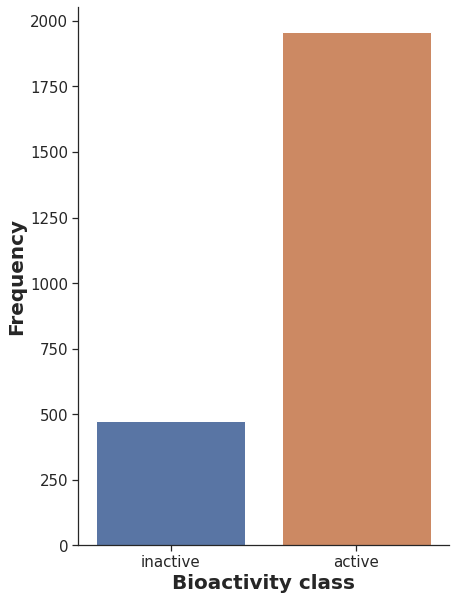

In [115]:
plt.figure(figsize=(6.5, 8.5))

sns.countplot(x='bioactivity_class', data=df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.set(style='ticks')
sns.despine(top=True)
plt.tight_layout()
plt.savefig('plot_bioactivity_class.png')

### Pairplot of the features

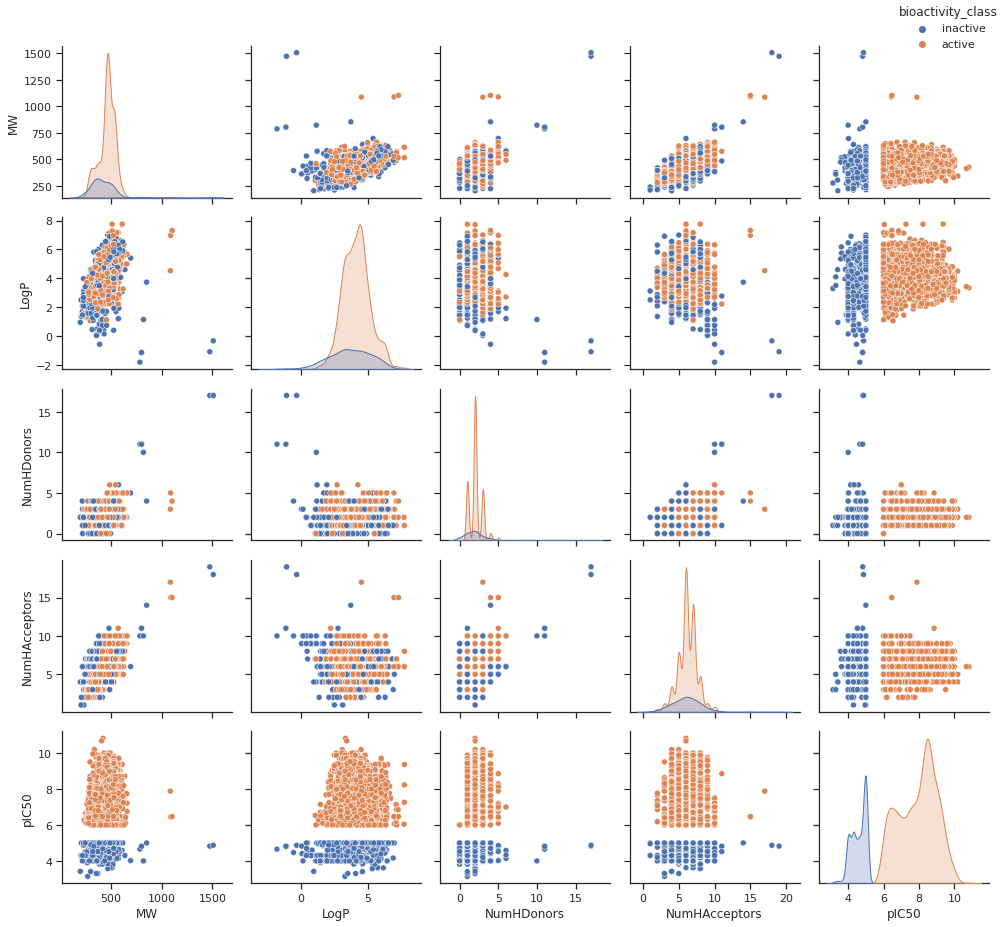

In [116]:
selection = ['bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors','pIC50']
sns.pairplot(df[selection], hue='bioactivity_class')._legend.set_bbox_to_anchor((1, 1))
plt.tight_layout()
plt.savefig('Pairplot.png',dpi=300)

### Boxplot of pIC50

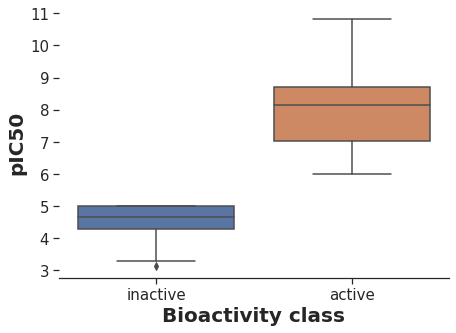

In [117]:
fig = plt.figure(figsize=(7,5))
sns.boxplot(x='bioactivity_class', y='pIC50', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('pIC50', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine(top=True, left=True)
plt.savefig('boxplot_pIC50.png',dpi=300);

### Boxplot of Lipinksi descriptors

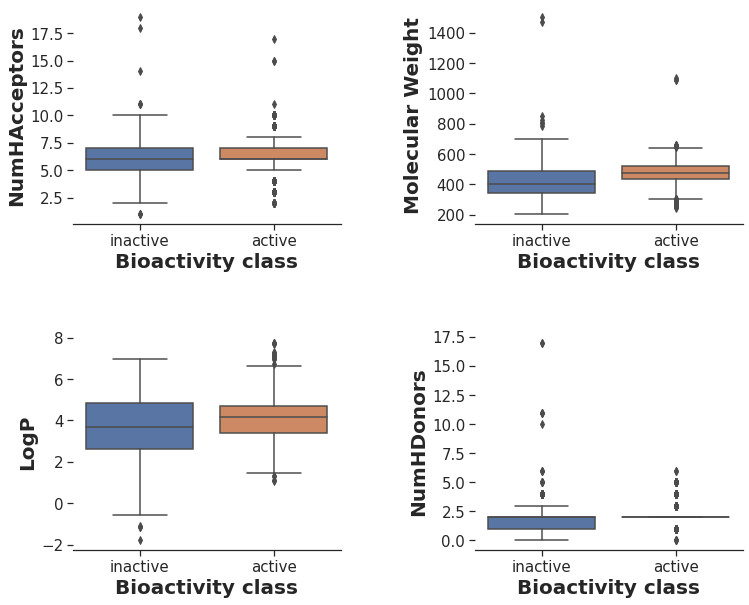

In [118]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
fig.add_subplot(2,2,1)
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('NumHAcceptors', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,2)
sns.boxplot(x='bioactivity_class', y='MW', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('Molecular Weight', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,3)
sns.boxplot(x='bioactivity_class', y='LogP', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('LogP', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,4)
sns.boxplot(x='bioactivity_class', y='NumHDonors', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('NumHDonors', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

sns.despine(top=True, left=True)
plt.savefig('boxplot_lipinksi_descriptors.png',dpi=300);

# Statistical analysis | Mann-Whitney U Test

In [119]:
def mannwhitney_(active,inactive, descriptor):
  stat, p = mannwhitneyu(active,inactive)
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [120]:
for feature in selection[1:]: 
    results=mannwhitney_(df[df['bioactivity_class'] != 'inactive'][feature],
                df[df['bioactivity_class'] ==  'inactive'][feature],
                feature)
    display(results)

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,309347.5,2.130316e-29,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,384089.5,4.863039e-09,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,406910.0,0.000005,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,434682.0,0.017773,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,7.796452e-251,0.05,Different distribution (reject H0)


In [121]:
df.to_csv('kinase.csv')

# Conclusion

Taking a look at pIC$_{50}$ values, the actives and inactives displayed statistically significant difference
, which is to be expected since threshold values (IC$_{50}$ < 1,000 nM = Actives while IC$_{50}$ > 10,000 nM = Inactives, corresponding to pIC$_{50}$ > 6 = Actives and pIC$_{50}$ < 5 =Inactives) were used to define actives and inactives.